### Import necessary libraries

In [435]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import pickle

### loading the dataset

In [436]:
df_remax=pd.read_csv('remax_location.csv')

In [437]:
df_star_location=pd.read_csv('properstar_location.csv')
df_star_location_commercial=pd.read_csv('properstar_commercial_location.csv')
df_star=pd.concat([df_star_location,df_star_location_commercial])

## Data exploration

### Properstar data

In [438]:
df_star.head(3)

statut                                         link  \
0  Location  https://www.properstar.fr/annonce/102564498   
1  Location  https://www.properstar.fr/annonce/102450826   
2  Location  https://www.properstar.fr/annonce/101457353   

                                          title        address   prix  Pi√®ces  \
0       location scolaire S+1 √† r√©sidence Tilel   Chott Meriam  196 ‚Ç¨     2.0   
1  Villa √† Louer √† Kantaoui - Location Annuelle         Akouda  482 ‚Ç¨     3.0   
2         location annuelle s+3 √† hammam Sousse  Hammam Sousse  451 ‚Ç¨     4.0   

   Etages Habitable  Climatisation    1  ...  \
0     2.0     60 m¬≤  Climatisation  1.0  ...   
1     1.0    130 m¬≤            NaN  1.0  ...   
2     4.0    100 m¬≤  Climatisation  1.0  ...   

  Recharge de v√©hicules √©lectriques Vue sur les collines Jardin: vue d√©gag√©e  \
0                               NaN                  NaN                 NaN   
1                               NaN                  NaN                 NaN   
2                               NaN                  NaN                 NaN   

  Vue sur la campagne Vue sur la verdure Vue du port Station de ski Sauna  \
0                 NaN                NaN         NaN            NaN   NaN   
1                 NaN                NaN         NaN            NaN   NaN   
2                 NaN                NaN         NaN            NaN   NaN   

  Orientation Ouest Orientation Sud  
0               NaN             NaN  
1               NaN             NaN  
2               NaN             NaN  

[3 rows x 102 columns]

In [439]:
df_star.shape

(391, 102)

In [440]:
df_star.columns

Index(['statut', 'link', 'title', 'address', 'prix', 'Pi√®ces', 'Etages',
       'Habitable', 'Climatisation', '1',
       ...
       'Recharge de v√©hicules √©lectriques', 'Vue sur les collines',
       'Jardin: vue d√©gag√©e', 'Vue sur la campagne', 'Vue sur la verdure',
       'Vue du port', 'Station de ski', 'Sauna', 'Orientation Ouest',
       'Orientation Sud'],
      dtype='object', length=102)

In [441]:
df_star.isna().sum().sort_values(ascending=True).head(25)

statut                     0
link                       0
prix                       0
title                      2
address                    2
1                         52
Pi√®ces                    55
Type                      80
Habitable                 86
Total                    157
Etages                   180
Meubl√©                   206
Climatisation            219
Chambres                 223
Salles de bains          225
Chauffage                227
Condition                235
Toilettes                239
Ann√©e de construction    239
Alarme                   248
Eau chaude               254
Taxi                     266
Ascenseur                266
Magasins                 268
Centre-ville             274
dtype: int64

### Remax

In [442]:
df_remax.head(3)

statut                                               link  \
0  Location  https://www.remax.com.tn/fr-tn/biens/maison-in...   
1  Location  https://www.remax.com.tn/fr-tn/biens/apparteme...   
2  Location  https://www.remax.com.tn/fr-tn/biens/apparteme...   

                                               title       prix  \
0  Maison individuelle - Location - Djerba - Mido...  2,000 TND   
1    Appartement - Location - L'Aouina Tunis Tunisie  1,100 TND   
2  Appartement - Location - La Soukra Ariana Tunisie  1,250 TND   

                                       address          statut_marche  \
0  4116 - Djerba - Midoun - M√©denine - Tunisie      Excellente valeur   
1                   L'Aouina - Tunis - Tunisie  Nouveau sur le march√©   
2                 La Soukra - Ariana - Tunisie           Remis √† neuf   

   Nombre de pi√®ces  Nombre de chambres  Nombre salles de bain   m¬≤  ...  \
0               3.0                 2.0                    2.0  400  ...   
1               3.0                 2.0                    1.0  100  ...   
2               4.0                 3.0                    1.0  125  ...   

   Energie solaire  Sud Sud-ouest  Ouest  Vue sur lac  A la campagne  \
0              NaN  NaN       NaN    NaN          NaN            NaN   
1              NaN  NaN       NaN    NaN          NaN            NaN   
2              NaN  NaN       NaN    NaN          NaN            NaN   

   Nord-ouest  Nord-est  Montagnes  Parcelle d'angle  
0         NaN       NaN        NaN               NaN  
1         NaN       NaN        NaN               NaN  
2         NaN       NaN        NaN               NaN  

[3 rows x 126 columns]

In [443]:
df_remax.shape

(218, 126)

In [444]:
df_remax.columns

Index(['statut', 'link', 'title', 'prix', 'address', 'statut_marche',
       'Nombre de pi√®ces', 'Nombre de chambres', 'Nombre salles de bain', 'm¬≤',
       ...
       'Energie solaire', 'Sud', 'Sud-ouest', 'Ouest', 'Vue sur lac',
       'A la campagne', 'Nord-ouest', 'Nord-est', 'Montagnes',
       'Parcelle d'angle'],
      dtype='object', length=126)

In [445]:
df_remax.isna().sum().sort_values(ascending=True).head(15)

statut                         0
link                           0
title                          0
prix                           0
address                        0
Nombre salles de bain         14
Nombre de pi√®ces              17
Nombre de chambres            17
Surface constructible (m¬≤)    23
m¬≤                            27
Ann√©e/Mois de Construction    33
Cuisine √©quip√©e               44
statut_marche                 58
Nombre d'√©tages               61
Nombre de WC                  80
dtype: int64

## Data Preprocessing

### Column selection

In [446]:
columns_to_keep=['address','Type', 'Habitable',
       'Pi√®ces', 'Salles de bains', 'Chambres','Garage','Jardin','Balcon','Meubl√©','Piscine','Etages', 'prix']
df_star=df_star[columns_to_keep]
df_star.head()

address         Type Habitable  Pi√®ces  Salles de bains  Chambres  \
0   Chott Meriam  Appartement     60 m¬≤     2.0              NaN       NaN   
1         Akouda       Maison    130 m¬≤     3.0              NaN       NaN   
2  Hammam Sousse  Appartement    100 m¬≤     4.0              NaN       NaN   
3        El Kram  Appartement    140 m¬≤     5.0              2.0       4.0   
4         Sousse  Appartement     70 m¬≤     2.0              NaN       NaN   

  Garage Jardin Balcon  Meubl√©  Piscine  Etages   prix  
0    NaN    NaN    NaN  Meubl√©  Piscine     2.0  196 ‚Ç¨  
1    NaN    NaN    NaN     NaN      NaN     1.0  482 ‚Ç¨  
2    NaN    NaN    NaN  Meubl√©      NaN     4.0  451 ‚Ç¨  
3    NaN    NaN    NaN     NaN      NaN     1.0  587 ‚Ç¨  
4    NaN    NaN    NaN     NaN      NaN     6.0  211 ‚Ç¨

In [447]:
df_star.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 76
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          389 non-null    object 
 1   Type             311 non-null    object 
 2   Habitable        305 non-null    object 
 3   Pi√®ces           336 non-null    float64
 4   Salles de bains  166 non-null    float64
 5   Chambres         168 non-null    float64
 6   Garage           5 non-null      object 
 7   Jardin           13 non-null     object 
 8   Balcon           76 non-null     object 
 9   Meubl√©           185 non-null    object 
 10  Piscine          78 non-null     object 
 11  Etages           211 non-null    float64
 12  prix             391 non-null    object 
dtypes: float64(4), object(9)
memory usage: 42.8+ KB


In [448]:
df_star.isna().sum().sort_values(ascending=False)

Garage             386
Jardin             378
Balcon             315
Piscine            313
Salles de bains    225
Chambres           223
Meubl√©             206
Etages             180
Habitable           86
Type                80
Pi√®ces              55
address              2
prix                 0
dtype: int64

In [449]:
columns_to_keep=['title','address', 'm¬≤',
       'Nombre de pi√®ces', 'Nombre salles de bain', 'Nombre de chambres',
       'Garage','Jardin','Balcon','Meubl√©','Piscine','Piscine ext√©rieure',"Nombre d'√©tages", 'prix']
df_remax=df_remax[columns_to_keep]
df_remax.head(3)


title  \
0  Maison individuelle - Location - Djerba - Mido...   
1    Appartement - Location - L'Aouina Tunis Tunisie   
2  Appartement - Location - La Soukra Ariana Tunisie   

                                       address   m¬≤  Nombre de pi√®ces  \
0  4116 - Djerba - Midoun - M√©denine - Tunisie  400               3.0   
1                   L'Aouina - Tunis - Tunisie  100               3.0   
2                 La Soukra - Ariana - Tunisie  125               4.0   

   Nombre salles de bain  Nombre de chambres  Garage  Jardin  Balcon  Meubl√©  \
0                    2.0                 2.0     NaN     1.0     NaN     1.0   
1                    1.0                 2.0     NaN     NaN     1.0     NaN   
2                    1.0                 3.0     NaN     NaN     1.0     NaN   

   Piscine  Piscine ext√©rieure  Nombre d'√©tages       prix  
0      1.0                 1.0              NaN  2,000 TND  
1      NaN                 NaN              3.0  1,100 TND  
2      NaN                 NaN              1.0  1,250 TND

In [450]:
df_remax.rename(columns={
    'm¬≤': 'Habitable',
    'Nombre de chambres':'Chambres',
    'Nombre de pi√®ces':'Pi√®ces',
    'Nombre salles de bain':'Salles de bains',
    "Nombre d'√©tages":'Etages'
}, inplace=True)
df_remax.head(1)

title  \
0  Maison individuelle - Location - Djerba - Mido...   

                                       address Habitable  Pi√®ces  \
0  4116 - Djerba - Midoun - M√©denine - Tunisie       400     3.0   

   Salles de bains  Chambres  Garage  Jardin  Balcon  Meubl√©  Piscine  \
0              2.0       2.0     NaN     1.0     NaN     1.0      1.0   

   Piscine ext√©rieure  Etages       prix  
0                 1.0     NaN  2,000 TND

In [451]:
df_remax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               218 non-null    object 
 1   address             218 non-null    object 
 2   Habitable           191 non-null    object 
 3   Pi√®ces              201 non-null    float64
 4   Salles de bains     204 non-null    float64
 5   Chambres            201 non-null    float64
 6   Garage              55 non-null     float64
 7   Jardin              76 non-null     float64
 8   Balcon              93 non-null     float64
 9   Meubl√©              114 non-null    float64
 10  Piscine             51 non-null     float64
 11  Piscine ext√©rieure  17 non-null     float64
 12  Etages              157 non-null    float64
 13  prix                218 non-null    object 
dtypes: float64(10), object(4)
memory usage: 24.0+ KB


### Transforming column types and reshaping data

#### properstar dataset

In [452]:
df_remax['prix'].sample(3)

141    5,000 TND
48     2,500 TND
43     1,100 TND
Name: prix, dtype: object

In [453]:
df_star['prix'].sample(3)

266    376 ‚Ç¨
278    376 ‚Ç¨
225    482 ‚Ç¨
Name: prix, dtype: object

#### Prix column

In [454]:
#update the price column
df_star['prix'] = df_star['prix'].apply(lambda x: str(x).replace('‚Ç¨','') if isinstance(x, str) else x)
df_star['prix'] = df_star['prix'].apply(lambda x: str(x).replace('\u202f', '') if isinstance(x, str) else x)
df_star['prix'] = df_star['prix'].apply(lambda x: str(x).replace(' ','') if isinstance(x, str) else x)
df_star['prix'] = df_star['prix'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df_star['prix'] = pd.to_numeric(df_star['prix'], errors='coerce')

#### Habitable,Total and Terrain

In [455]:
df_star.sample(1)

address         Type Habitable  Pi√®ces  Salles de bains  Chambres  \
83  Chott Meriam  Appartement    100 m¬≤     4.0              NaN       NaN   

   Garage Jardin Balcon  Meubl√©  Piscine  Etages  prix  
83    NaN    NaN    NaN  Meubl√©  Piscine     3.0   175

In [456]:
def clean_size_column(df, col):
    """
    Cleans a size-related column by:
    1. Removing 'm¬≤' and any non-breaking spaces.
    2. Stripping leading/trailing spaces.
    3. Converting cleaned values to numeric (float).
    4. Handling missing or invalid values gracefully.
    """
    df[col] = df[col].astype(str)  # Convert all to string to prevent errors
    df[col] = df[col].str.replace('m¬≤', '', regex=False)  # Remove 'm¬≤'
    df[col] = df[col].str.replace('\u202f', '', regex=False)  # Remove non-breaking spaces
    df[col] = df[col].str.replace(' ', '', regex=False)  # Remove normal spaces
    df[col] = df[col].str.strip()  # Strip leading/trailing spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, setting errors to NaN

# Example usage
columns_to_clean = ['Habitable']  # List of size-related columns
for col in columns_to_clean:
    clean_size_column(df_star, col)

# Check the cleaned columns
df_star[columns_to_clean].head()


Habitable
0       60.0
1      130.0
2      100.0
3      140.0
4       70.0

#### Type column

In [457]:
df_star['Type'] = df_star['Type'].replace({'Appartement': 'Residential','Maison':'Residential'})
df_star['Type'].value_counts()

Type
Residential    289
Commercial      22
Name: count, dtype: int64

#### remax dataset

#### title column

In [458]:
df_remax['title'] = df_remax['title'].str.split('-').str[0]
# Remove trailing/leading spaces
df_remax['Type'] = df_remax['title'].str.strip()

# Handle specific cases for "1" and "6 and More"
df_remax = df_remax[ (df_remax['Type']!='6 and More') & (df_remax['Type']!='1') ]

# Optional: categorize property types
def categorize_property(property_type):
    if property_type in ["Appartement", "Villa", "Maison", "Duplex", "Penthouse", "Studio", "R√©sidence"]:
        return "Residential"
    elif property_type in ["Commercial", "Showroom", "Bureau", "Office", "Local Commercial", "Building"]:
        return "Commercial"
    elif property_type in ["Terrain", "Lot", "Land", "Agricole"]:
        return "Land"
    elif property_type in ["H√¥tel", "Warehouse", "Usine", "Entrep√¥t", "Industrie"]:
        return "Industrial"
    else:
        return "Other"
df_remax['Type'] = df_remax['Type'].apply(categorize_property)
df_remax=df_remax.drop(columns=['title'])
df_remax['Type'].value_counts()

Type
Residential    177
Other           41
Name: count, dtype: int64

#### other columns

In [459]:
df_remax.head(1)

address Habitable  Pi√®ces  \
0  4116 - Djerba - Midoun - M√©denine - Tunisie       400     3.0   

   Salles de bains  Chambres  Garage  Jardin  Balcon  Meubl√©  Piscine  \
0              2.0       2.0     NaN     1.0     NaN     1.0      1.0   

   Piscine ext√©rieure  Etages       prix   Type  
0                 1.0     NaN  2,000 TND  Other

In [460]:
#change column types
df_remax['Habitable'] = df_remax['Habitable'].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df_remax['Habitable'] = pd.to_numeric(df_remax['Habitable'], errors='coerce')

df_remax['prix'] = df_remax['prix'].apply(lambda x: str(x).replace('TND','') if isinstance(x, str) else x)
df_remax['prix'] = df_remax['prix'].apply(lambda x: str(x).replace(',','') if isinstance(x, str) else x)
df_remax['prix'] = df_remax['prix'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df_remax['prix'] = pd.to_numeric(df_remax['prix'], errors='coerce')

columns_with_zero=['Garage','Jardin','Balcon','Meubl√©','Piscine','Piscine ext√©rieure']
for col in columns_with_zero:
    df_remax[col]=df_remax[col].fillna(0)
df_remax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             218 non-null    object 
 1   Habitable           191 non-null    float64
 2   Pi√®ces              201 non-null    float64
 3   Salles de bains     204 non-null    float64
 4   Chambres            201 non-null    float64
 5   Garage              218 non-null    float64
 6   Jardin              218 non-null    float64
 7   Balcon              218 non-null    float64
 8   Meubl√©              218 non-null    float64
 9   Piscine             218 non-null    float64
 10  Piscine ext√©rieure  218 non-null    float64
 11  Etages              157 non-null    float64
 12  prix                195 non-null    float64
 13  Type                218 non-null    object 
dtypes: float64(12), object(2)
memory usage: 24.0+ KB


In [461]:
df_remax['Piscine'] = df_remax[['Piscine', 'Piscine ext√©rieure']].max(axis=1)

In [462]:
df_remax=df_remax.drop('Piscine ext√©rieure',axis=1)
df_remax.head(1)

address  Habitable  Pi√®ces  \
0  4116 - Djerba - Midoun - M√©denine - Tunisie      400.0     3.0   

   Salles de bains  Chambres  Garage  Jardin  Balcon  Meubl√©  Piscine  Etages  \
0              2.0       2.0     0.0     1.0     0.0     1.0      1.0     NaN   

     prix   Type  
0  2000.0  Other

#### combine the two dataframes into one

In [463]:
df=pd.concat([df_remax,df_star])
print(df.shape)
df.head()

(609, 13)


address  Habitable  Pi√®ces  \
0        4116 - Djerba - Midoun - M√©denine - Tunisie      400.0     3.0   
1                         L'Aouina - Tunis - Tunisie      100.0     3.0   
2                       La Soukra - Ariana - Tunisie      125.0     4.0   
3  Ennasr II, Ariana - 2001 - Ennasr 1-2 - Ariana...      196.0     4.0   
4              La Marsa - La Marsa - Tunis - Tunisie       60.0     2.0   

   Salles de bains  Chambres Garage Jardin Balcon Meubl√© Piscine  Etages  \
0              2.0       2.0    0.0    1.0    0.0    1.0     1.0     NaN   
1              1.0       2.0    0.0    0.0    1.0    0.0     0.0     3.0   
2              1.0       3.0    0.0    0.0    1.0    0.0     0.0     1.0   
3              1.0       3.0    0.0    0.0    0.0    1.0     0.0     3.0   
4              1.0       1.0    0.0    0.0    1.0    1.0     0.0     1.0   

     prix         Type  
0  2000.0        Other  
1  1100.0  Residential  
2  1250.0  Residential  
3  3000.0  Residential  
4  2200.0  Residential

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 0 to 76
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          607 non-null    object 
 1   Habitable        496 non-null    float64
 2   Pi√®ces           537 non-null    float64
 3   Salles de bains  370 non-null    float64
 4   Chambres         369 non-null    float64
 5   Garage           223 non-null    object 
 6   Jardin           231 non-null    object 
 7   Balcon           294 non-null    object 
 8   Meubl√©           403 non-null    object 
 9   Piscine          296 non-null    object 
 10  Etages           368 non-null    float64
 11  prix             586 non-null    float64
 12  Type             529 non-null    object 
dtypes: float64(6), object(7)
memory usage: 66.6+ KB


### Handling missing values

In [465]:
df_clean=df.dropna(subset=['prix'])
df_clean.shape

(586, 13)

In [466]:
df_clean['Jardin'].value_counts()

Jardin
0.0        128
1.0         67
Jardin       5
300 m¬≤       3
350 m¬≤       2
486 m¬≤       1
240 m¬≤       1
1000 m¬≤      1
Name: count, dtype: int64

In [467]:
df_clean['Jardin'].fillna(0,inplace=True)
df_clean['Jardin'] = df_clean['Jardin'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Jardin'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\3393552808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Jardin'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\3393552808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Jardin'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykern

Jardin
0    506
1     80
Name: count, dtype: int64

In [468]:
df_clean['Balcon'].value_counts()

Balcon
0.0       112
1.0        83
Balcon     76
Name: count, dtype: int64

In [469]:
df_clean['Balcon'].fillna(0,inplace=True)
df_clean['Balcon'] = df_clean['Balcon'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Balcon'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\234478673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Balcon'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\234478673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Balcon'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel

Balcon
0    427
1    159
Name: count, dtype: int64

In [470]:
df_clean['Meubl√©'].value_counts()

Meubl√©
Meubl√©    185
1.0       106
0.0        89
Name: count, dtype: int64

In [471]:
df_clean['Meubl√©'].fillna(0,inplace=True)
df_clean['Meubl√©'] = df_clean['Meubl√©'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Meubl√©'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\1602645294.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Meubl√©'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\1602645294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Meubl√©'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipyke

Meubl√©
0    295
1    291
Name: count, dtype: int64

In [472]:
df_clean['Piscine'].value_counts()

Piscine
0.0        148
Piscine     78
1.0         47
Name: count, dtype: int64

In [473]:
df_clean['Piscine'].fillna(0,inplace=True)
df_clean['Piscine'] = df_clean['Piscine'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Piscine'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\2679576601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Piscine'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\2679576601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Piscine'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipyke

Piscine
0    461
1    125
Name: count, dtype: int64

In [474]:
df_clean['Garage'].value_counts()

Garage
0.0       146
1.0        49
Garage      5
Name: count, dtype: int64

In [475]:
df_clean['Garage'].fillna(0,inplace=True)
df_clean['Garage'] = df_clean['Garage'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Garage'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\51011127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Garage'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\51011127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Garage'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_1

Garage
0    532
1     54
Name: count, dtype: int64

In [476]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586 entries, 0 to 76
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          584 non-null    object 
 1   Habitable        473 non-null    float64
 2   Pi√®ces           514 non-null    float64
 3   Salles de bains  349 non-null    float64
 4   Chambres         348 non-null    float64
 5   Garage           586 non-null    int64  
 6   Jardin           586 non-null    int64  
 7   Balcon           586 non-null    int64  
 8   Meubl√©           586 non-null    int64  
 9   Piscine          586 non-null    int64  
 10  Etages           352 non-null    float64
 11  prix             586 non-null    float64
 12  Type             506 non-null    object 
dtypes: float64(6), int64(5), object(2)
memory usage: 64.1+ KB


In [477]:
def plot_distribution(data,title,xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)  # kde=True will add a kernel density estimate curve to visualize distribution smoothly
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

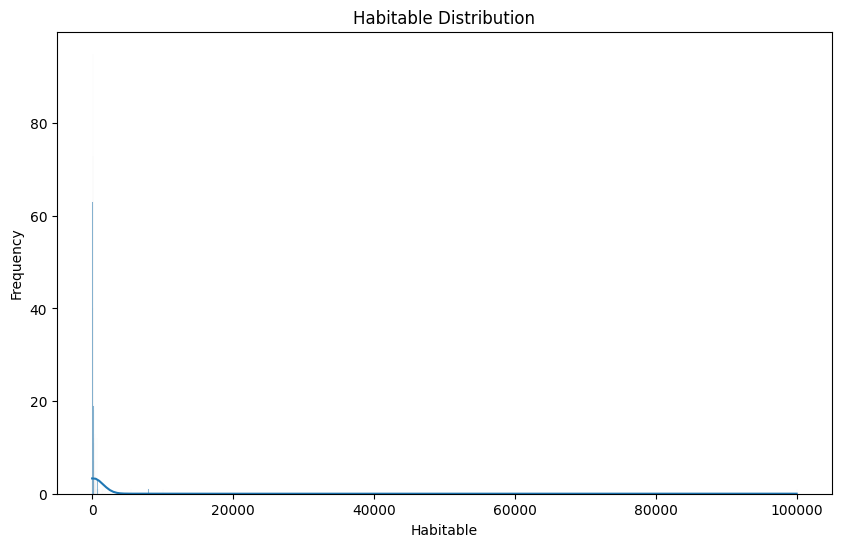

In [478]:
plot_distribution(df_clean['Habitable'],'Habitable Distribution','Habitable')

In [479]:
# Replace missing values with median since the distribution is skwed
df_clean['Habitable'].fillna(df_clean['Habitable'].median(), inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\1680901862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Habitable'].fillna(df_clean['Habitable'].median(), inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\1680901862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Habitable'].fillna(df_clean['Habitable

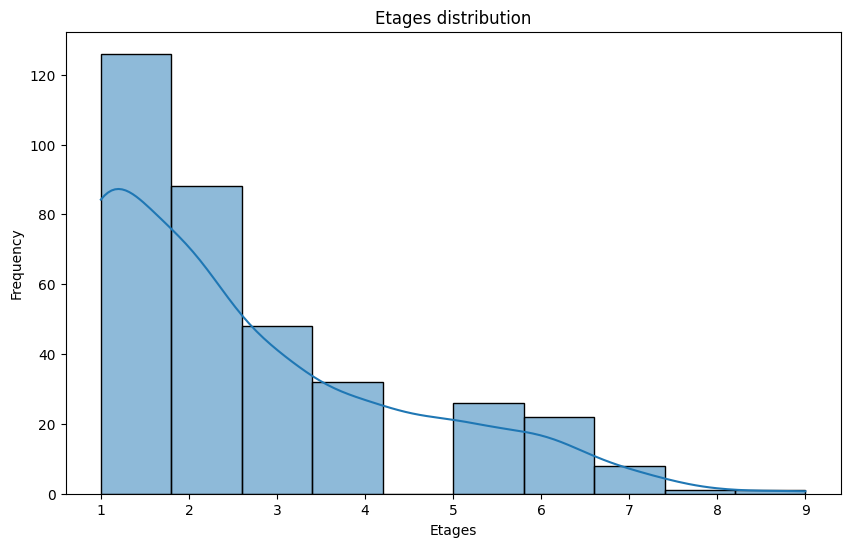

In [480]:
plot_distribution(df_clean['Etages'],'Etages distribution','Etages')

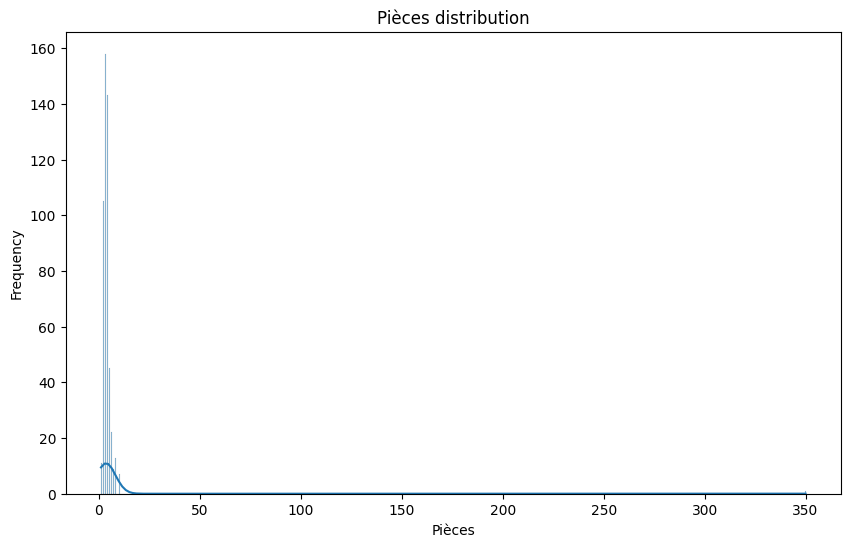

In [481]:
plot_distribution(df_clean['Pi√®ces'],'Pi√®ces distribution','Pi√®ces')

In [482]:
# Replace missing values with median since the distribution is skwed
df_clean['Pi√®ces'].fillna(df_clean['Pi√®ces'].median(), inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\3906860705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Pi√®ces'].fillna(df_clean['Pi√®ces'].median(), inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\3906860705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Pi√®ces'].fillna(df_clean['Pi√®ces'].media

In [483]:
df_clean = df_clean[df_clean['Pi√®ces']<20]

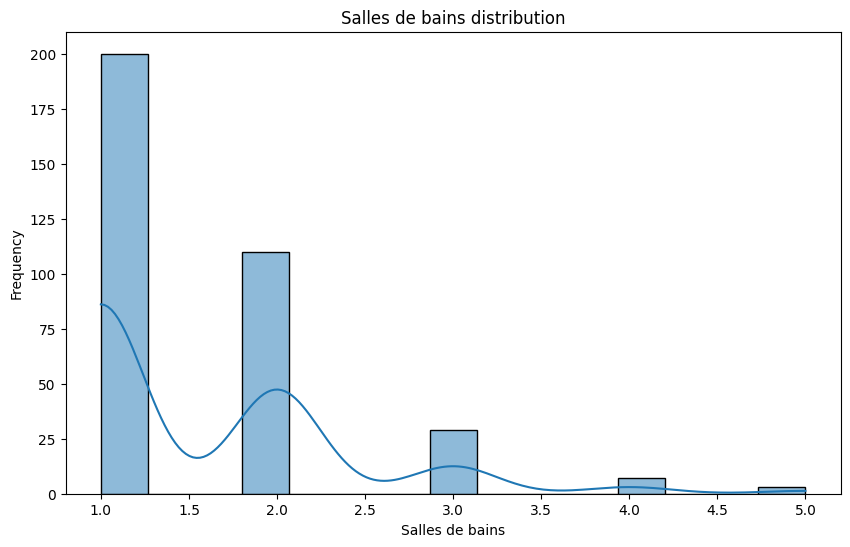

In [484]:
plot_distribution(df_clean['Salles de bains'],'Salles de bains distribution','Salles de bains')

In [485]:
# Replace missing values with mode since the distribution is categorical
df_clean['Salles de bains'].fillna(df_clean['Salles de bains'].mode()[0], inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\2135588293.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Salles de bains'].fillna(df_clean['Salles de bains'].mode()[0], inplace=True)


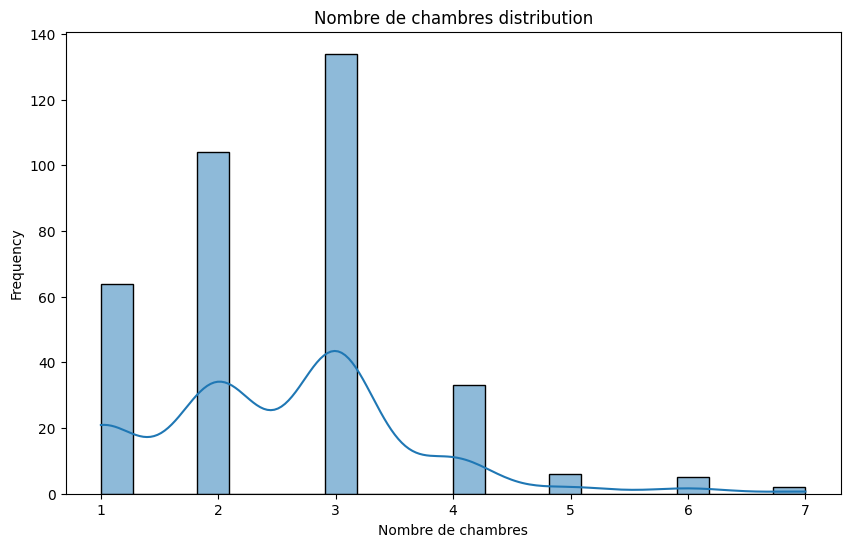

In [486]:
plot_distribution(df_clean['Chambres'],'Nombre de chambres distribution','Nombre de chambres')

In [487]:
# Replace missing values with mode since the distribution is categorical
df_clean['Chambres'].fillna(df_clean['Chambres'].mode()[0], inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\3383310863.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Chambres'].fillna(df_clean['Chambres'].mode()[0], inplace=True)


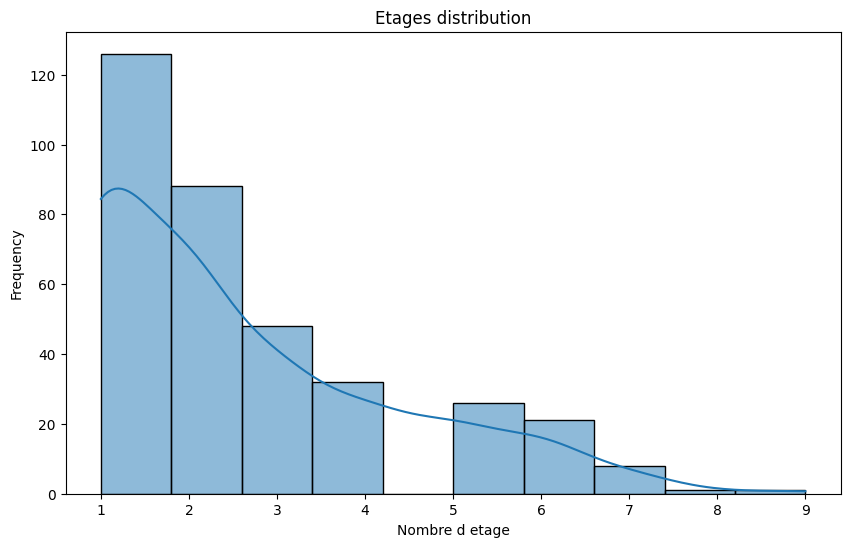

In [488]:
plot_distribution(df_clean['Etages'],'Etages distribution','Nombre d etage')

In [489]:
# Replace missing values with mode since the distribution is categorical
df_clean['Etages'].fillna(df_clean['Etages'].mode()[0], inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\1566603011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Etages'].fillna(df_clean['Etages'].mode()[0], inplace=True)


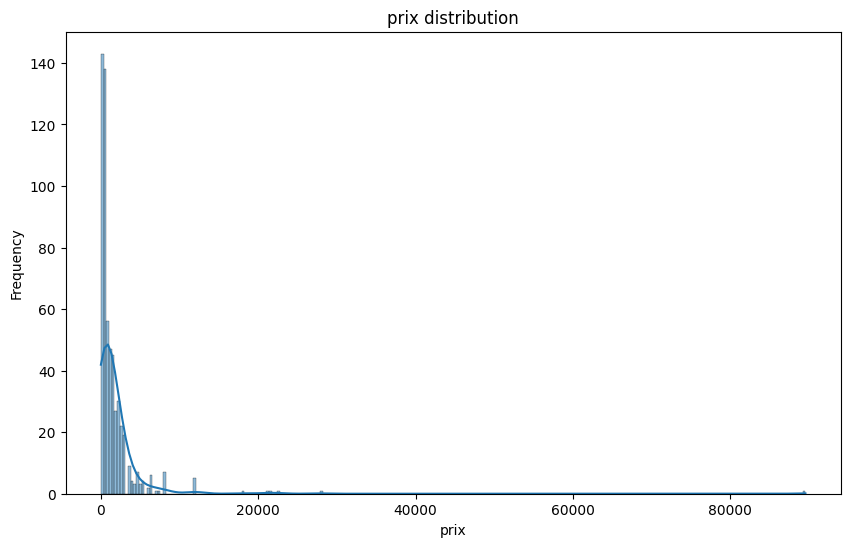

In [490]:
plot_distribution(df_clean['prix'],'prix distribution','prix')

In [491]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to numerical columns
for col in ["prix", "Habitable", "Pi√®ces"]:
    df_clean = remove_outliers_iqr(df_clean, col)


In [492]:
df_clean['prix'].describe()

count     441.000000
mean      909.603175
std       855.294598
min         0.000000
25%       301.000000
50%       542.000000
75%      1400.000000
max      3800.000000
Name: prix, dtype: float64

In [493]:
df_clean = df_clean[df_clean['prix'] > 0]

In [494]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 1 to 75
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          411 non-null    object 
 1   Habitable        411 non-null    float64
 2   Pi√®ces           411 non-null    float64
 3   Salles de bains  411 non-null    float64
 4   Chambres         411 non-null    float64
 5   Garage           411 non-null    int64  
 6   Jardin           411 non-null    int64  
 7   Balcon           411 non-null    int64  
 8   Meubl√©           411 non-null    int64  
 9   Piscine          411 non-null    int64  
 10  Etages           411 non-null    float64
 11  prix             411 non-null    float64
 12  Type             371 non-null    object 
dtypes: float64(6), int64(5), object(2)
memory usage: 45.0+ KB


## Feature Engineering

### Address column

In [495]:
#this part gets us the latitude and longitude 
geolocator = Nominatim(user_agent="my_unique_app_12345")

def get_coordinates(address):
    try:
        location = geolocator.geocode(address, timeout=10)  # Increase timeout
        if location:
            return pd.Series([location.latitude, location.longitude])
    except GeocoderTimedOut:
        time.sleep(1)  # Wait and retry in case of timeout
        return get_coordinates(address)  # Retry
    return pd.Series([None, None])

df_clean[['Latitude', 'Longitude']] = df_clean['address'].apply(get_coordinates)

In [496]:
df_clean=df_clean.drop(columns=['address'])
df_clean.head()

Habitable  Pi√®ces  Salles de bains  Chambres  Garage  Jardin  Balcon  \
1      100.0     3.0              1.0       2.0       0       0       1   
2      125.0     4.0              1.0       3.0       0       0       1   
3      196.0     4.0              1.0       3.0       0       0       0   
4       60.0     2.0              1.0       1.0       0       0       1   
5      159.0     3.0              1.0       3.0       0       0       0   

   Meubl√©  Piscine  Etages    prix         Type   Latitude  Longitude  
1       0        0     3.0  1100.0  Residential  36.849148  10.263936  
2       0        0     1.0  1250.0  Residential  36.874975  10.245427  
3       1        0     3.0  3000.0  Residential        NaN        NaN  
4       1        0     1.0  2200.0  Residential  36.887333  10.315343  
5       1        0     1.0  3500.0        Other  36.847856  10.265324

In [497]:
from sklearn.impute import KNNImputer
# Assuming df is your dataframe
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors
df_clean[['Latitude', 'Longitude']] = imputer.fit_transform(df_clean[['Latitude', 'Longitude']])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 1 to 75
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Habitable        411 non-null    float64
 1   Pi√®ces           411 non-null    float64
 2   Salles de bains  411 non-null    float64
 3   Chambres         411 non-null    float64
 4   Garage           411 non-null    int64  
 5   Jardin           411 non-null    int64  
 6   Balcon           411 non-null    int64  
 7   Meubl√©           411 non-null    int64  
 8   Piscine          411 non-null    int64  
 9   Etages           411 non-null    float64
 10  prix             411 non-null    float64
 11  Type             371 non-null    object 
 12  Latitude         411 non-null    float64
 13  Longitude        411 non-null    float64
dtypes: float64(8), int64(5), object(1)
memory usage: 48.2+ KB


### Columns correlation

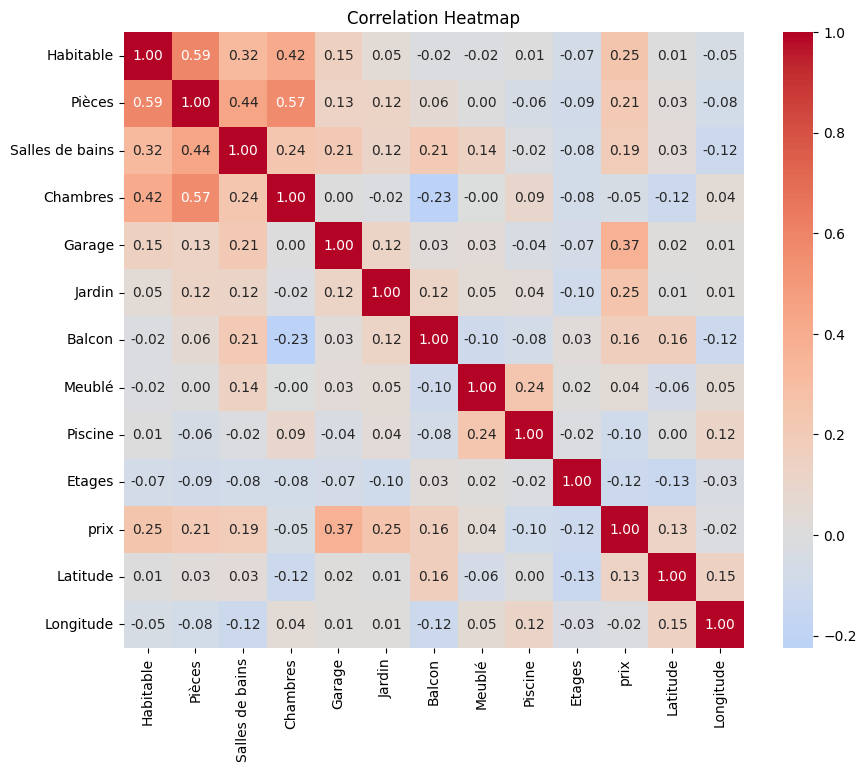

In [498]:
# Filter only numeric columns
df_numeric = df_clean.select_dtypes(include=["number"])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()


### Encoding

In [499]:
df_clean.head(1)

Habitable  Pi√®ces  Salles de bains  Chambres  Garage  Jardin  Balcon  \
1      100.0     3.0              1.0       2.0       0       0       1   

   Meubl√©  Piscine  Etages    prix         Type   Latitude  Longitude  
1       0        0     3.0  1100.0  Residential  36.849148  10.263936

In [500]:
# Find the most frequent (mode) value
most_frequent = df_clean['Type'].mode()[0]
# Fill missing values with the most frequent value
df_clean['Type'].fillna(most_frequent, inplace=True)
df_encoded = pd.get_dummies(df_clean, columns=['Type'], drop_first=True)
df_encoded.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_19068\2319487793.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Type'].fillna(most_frequent, inplace=True)


Habitable  Pi√®ces  Salles de bains  Chambres  Garage  Jardin  Balcon  \
1      100.0     3.0              1.0       2.0       0       0       1   
2      125.0     4.0              1.0       3.0       0       0       1   
3      196.0     4.0              1.0       3.0       0       0       0   
4       60.0     2.0              1.0       1.0       0       0       1   
5      159.0     3.0              1.0       3.0       0       0       0   

   Meubl√©  Piscine  Etages    prix   Latitude  Longitude  Type_Other  \
1       0        0     3.0  1100.0  36.849148  10.263936       False   
2       0        0     1.0  1250.0  36.874975  10.245427       False   
3       1        0     3.0  3000.0  36.585017  10.050682       False   
4       1        0     1.0  2200.0  36.887333  10.315343       False   
5       1        0     1.0  3500.0  36.847856  10.265324        True   

   Type_Residential  
1              True  
2              True  
3              True  
4              True  
5             False

In [501]:
# Convert boolean columns to integer
bool_columns = ["Type_Other", "Type_Residential"]
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

### Building the model

In [502]:
syn_df=pd.read_csv('synthatic_location.csv')
syn_df=syn_df.drop(columns=['Unnamed: 0','Total'])
syn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Habitable         5000 non-null   float64
 1   Pi√®ces            5000 non-null   float64
 2   Salles de bains   5000 non-null   float64
 3   Chambres          5000 non-null   float64
 4   Garage            5000 non-null   int64  
 5   Jardin            5000 non-null   int64  
 6   Balcon            5000 non-null   int64  
 7   Meubl√©            5000 non-null   int64  
 8   Piscine           5000 non-null   int64  
 9   Etages            5000 non-null   float64
 10  prix              5000 non-null   float64
 11  Latitude          5000 non-null   float64
 12  Longitude         5000 non-null   float64
 13  Type_Other        5000 non-null   int64  
 14  Type_Residential  5000 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 586.1 KB


In [503]:
final_df=pd.concat([df_encoded,syn_df])
X=final_df.drop(columns=['prix'])
y=final_df['prix']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [504]:
#final_df.to_csv('fnal_df_location.csv') we are gonna use it to generate synthatic data

this code is to find the best hyperparameters

In [505]:
"""
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    "n_estimators": [500, 700, 900],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [5, 7, 9],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [3, 5, 7],
    "subsample": [0.7, 0.9]
}

# Initialize model
gb_regressor = GradientBoostingRegressor(random_state=41)

# Perform Grid Search
grid_search = GridSearchCV(
    gb_regressor, param_grid=param_grid,
    cv=5, scoring="neg_root_mean_squared_error",
    n_jobs=-1, verbose=1
)

# Fit the search
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)
"""

'\nfrom sklearn.model_selection import GridSearchCV\n# Define parameter grid\nparam_grid = {\n    "n_estimators": [500, 700, 900],\n    "learning_rate": [0.01, 0.05, 0.1],\n    "max_depth": [5, 7, 9],\n    "min_samples_split": [5, 10, 15],\n    "min_samples_leaf": [3, 5, 7],\n    "subsample": [0.7, 0.9]\n}\n\n# Initialize model\ngb_regressor = GradientBoostingRegressor(random_state=41)\n\n# Perform Grid Search\ngrid_search = GridSearchCV(\n    gb_regressor, param_grid=param_grid,\n    cv=5, scoring="neg_root_mean_squared_error",\n    n_jobs=-1, verbose=1\n)\n\n# Fit the search\ngrid_search.fit(X_train, y_train)\n\n# Print best parameters\nprint("Best Hyperparameters:", grid_search.best_params_)\n'

In [506]:
# ‚úÖ Define the model with the best hyperparameters
from sklearn.ensemble import GradientBoostingRegressor
sgb = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=7,
    min_samples_leaf=3,
    min_samples_split=10,
    n_estimators=700,
    subsample=0.9,
    random_state=42
)

# ‚úÖ Train the model
sgb.fit(X_train, y_train)

# ‚úÖ Predict on test data
y_pred = sgb.predict(X_test)

# ‚úÖ Compute Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ‚úÖ Print results
print(f"üîπ Real RMSE: {rmse:.2f}")
print(f"üîπ Mean Absolute Error: {mae:.2f}")
print(f"üîπ R¬≤ Score: {r2:.4f}")


üîπ Real RMSE: 133.71
üîπ Mean Absolute Error: 32.19
üîπ R¬≤ Score: 0.9740


### Download the model

In [507]:
with open('model_location','wb') as f:
    pickle.dump(sgb,f)